In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RBF SVM classifier with gamma=0.1
clf = SVC(kernel='rbf', gamma=0.1)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.935


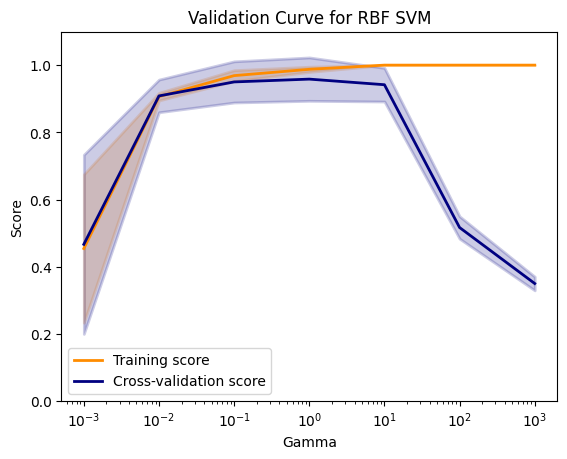

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM gamma parameter range
param_range = np.logspace(-3, 3, 7)

# Calculate the validation curve for the SVM gamma parameter
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf'), X_train, y_train, param_name="gamma", param_range=param_range, cv=5)

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.title("Validation Curve for RBF SVM")
plt.xlabel("Gamma")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()